# Entrenando datos

In [2]:
import numpy as pd
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_plague = pd.ExcelFile('D:/bibliografia de tesis/Datos/ConsolidadoPlagas_Instalacion_2019.xlsx')
dfPlague = data_plague.parse('2019')

In [5]:
dfPlague.columns

Index(['Evaluador', 'Fecha', 'FUNDO', 'FILTRADO', 'TURNO', 'LOTE',
       'des_nivel1', 'des_nivel2', 'Caracteristica', 'Suma', 'Grado',
       'Promedio', 'Porcentaje'],
      dtype='object')

In [8]:
from datetime import datetime

In [9]:
dfPlgLt = dfPlague['LOTE'] == 3001 
filtered_df = dfPlague[dfPlgLt]
filtered_df = filtered_df[filtered_df['Fecha'] >= datetime.strptime('2019-01-01', '%Y-%m-%d')]
filtered_df = filtered_df.drop(['Evaluador','FUNDO','FILTRADO','TURNO', 'Grado', 'Promedio', 'Porcentaje'], axis = 1)

In [10]:
filtered_df.head()

,Fecha,LOTE,des_nivel1,des_nivel2,Caracteristica,Suma
812,2019-01-08 00:00:00,3001,HOJAS,"ALEURODICUS COCOIS, ALEURODICUS JULEIKAE",N° HOJAS INFESTADAS,0
813,2019-01-08 00:00:00,3001,HOJAS,"ALEURODICUS COCOIS, ALEURODICUS JULEIKAE",G° INFESTACIÓN (NINFAS-ADULTOS),0
814,2019-01-08 00:00:00,3001,HOJAS,"ALEURODICUS COCOIS, ALEURODICUS JULEIKAE",G° DE FUMAGINA,0
815,2019-01-08 00:00:00,3001,HOJAS,ALEUROPLEUROCELUS,N° HOJAS INFESTADAS,0
816,2019-01-08 00:00:00,3001,HOJAS,ALEUROPLEUROCELUS,G° INFESTACIÓN (NINFAS-ADULTOS),0


## Bemisia Tabaci
### N° HOJAS INFESTADAS

In [11]:
fl_df_Bemisia = filtered_df[filtered_df['des_nivel2'] == 'BEMISIA TABACI']
fl_df_Bemisia_HojInf = fl_df_Bemisia[fl_df_Bemisia['Caracteristica'] == 'N° HOJAS INFESTADAS']

In [14]:
fl_df_Bemisia_HojInf = fl_df_Bemisia_HojInf.loc[:,['Fecha','des_nivel2', 'Suma']]
fl_df_Bemisia_HojInf.reset_index(drop = True, inplace = True)

In [15]:
fl_df_Bemisia_HojInf

,Fecha,des_nivel2,Suma
0,2019-01-08 00:00:00,BEMISIA TABACI,30
1,2019-02-02 00:00:00,BEMISIA TABACI,0
2,2019-04-29 00:00:00,BEMISIA TABACI,24
3,2019-05-13 00:00:00,BEMISIA TABACI,33
4,2019-05-21 00:00:00,BEMISIA TABACI,27
5,2019-05-28 00:00:00,BEMISIA TABACI,24
6,2019-06-03 00:00:00,BEMISIA TABACI,32
7,2019-06-25 00:00:00,BEMISIA TABACI,23
8,2019-07-01 00:00:00,BEMISIA TABACI,21
9,2019-08-15 00:00:00,BEMISIA TABACI,18


# Clima
## Leyendo excel

In [16]:
data_weather = pd.ExcelFile('D:/bibliografia de tesis/Datos/Datos Climaticos Viru Palto.xlsx')
df_weather = data_weather.parse('TABLA')   

In [17]:
df_weather.columns

Index(['Año', 'Semana', 'Mes', 'Fecha', 'ET(mm).', 'Tº MIN/DIA (°C)',
       'Tº MAX/DIA (°C)', 'Dif. Térmico', 'T° Prom <15 °C',
       'T° Prom 15 a 17 °C ', 'T° Prom >17 °C', 'T° Prom/Día (°C)',
       'Rad. Solar Prom.', 'Rad. Solar Max.', 'HUMEDAD PROM.', 'HUMEDAD MIN.',
       'HUMEDAD MAX.', 'HR > 85%', 'HR > 90%', 'HR > 95%', 'Nº Hrs Rocio Día',
       'Humedad Relativa Mín.(%)', 'Humedad Relativa Max.(%)',
       'Velocidad del Viento Promedio (km/hr)',
       'Dirección del Viento         (07:00 pm)', 'LR Máx. (M3/Ha/Día)',
       'Precipit. MM3'],
      dtype='object')

In [18]:
df_weather = df_weather[df_weather['Fecha'] >= '2019-01-01']
df_weather = df_weather[['Fecha','ET(mm).','Tº MIN/DIA (°C)','Tº MAX/DIA (°C)','Rad. Solar Prom.','HUMEDAD PROM.']]

In [19]:
df_weather

,Fecha,ET(mm).,Tº MIN/DIA (°C),Tº MAX/DIA (°C),Rad. Solar Prom.,HUMEDAD PROM.
1096,2019-01-01,4.000,19.0,26.4,242.9,85.0
1097,2019-01-02,4.200,19.1,26.8,256.5,86.0
1098,2019-01-03,3.200,20.4,27.4,187.1,86.0
1099,2019-01-04,4.300,18.6,28.2,257.4,84.0
1100,2019-01-05,3.600,20.8,27.4,211.0,83.0
...,...,...,...,...,...,...
1917,2021-04-01,2.996,18.2,26.3,249.9,86.0
1918,2021-04-02,2.896,17.8,25.5,222.6,85.0
1919,2021-04-03,2.767,19.2,26.6,221.3,84.0
1920,2021-04-04,4.342,18.7,28.2,253.1,84.0


In [21]:
df_weather = df_weather.rename(columns = {'ET(mm).' : 'ET', 
                                      'Tº MIN/DIA (°C)' : 'T_MIN',
                                     'Tº MAX/DIA (°C)': 'T_MAX',
                                     'Rad. Solar Prom.' : 'RS_PROM',
                                     'HUMEDAD PROM.': 'HM_PROM'})

In [22]:
df_weather

,Fecha,ET,T_MIN,T_MAX,RS_PROM,HM_PROM
1096,2019-01-01,4.000,19.0,26.4,242.9,85.0
1097,2019-01-02,4.200,19.1,26.8,256.5,86.0
1098,2019-01-03,3.200,20.4,27.4,187.1,86.0
1099,2019-01-04,4.300,18.6,28.2,257.4,84.0
1100,2019-01-05,3.600,20.8,27.4,211.0,83.0
...,...,...,...,...,...,...
1917,2021-04-01,2.996,18.2,26.3,249.9,86.0
1918,2021-04-02,2.896,17.8,25.5,222.6,85.0
1919,2021-04-03,2.767,19.2,26.6,221.3,84.0
1920,2021-04-04,4.342,18.7,28.2,253.1,84.0


In [23]:
## Recorriendo dataframe de Clima para obtener los días iguales a las evaluaciones de Bemisisa Tabaci

In [32]:
fl_df_weather = df_weather[df_weather['Fecha'].isin(fl_df_Bemisia_HojInf['Fecha'].unique())]
fl_df_weather.head()

,Fecha,ET,T_MIN,T_MAX,RS_PROM,HM_PROM
1103,2019-01-08,2.6,21.4,27.0,144.5,84.0
1128,2019-02-02,4.2,21.8,31.3,232.6,80.0
1214,2019-04-29,3.6,19.6,27.6,207.9,86.0
1228,2019-05-13,1.8,18.8,25.1,106.3,85.0
1236,2019-05-21,2.8,16.2,24.8,176.1,84.0


In [34]:
fl_df_weather.reset_index(drop = True, inplace = True)
fl_df_weather.head()

,Fecha,ET,T_MIN,T_MAX,RS_PROM,HM_PROM
0,2019-01-08,2.6,21.4,27.0,144.5,84.0
1,2019-02-02,4.2,21.8,31.3,232.6,80.0
2,2019-04-29,3.6,19.6,27.6,207.9,86.0
3,2019-05-13,1.8,18.8,25.1,106.3,85.0
4,2019-05-21,2.8,16.2,24.8,176.1,84.0


In [40]:
fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
fl_df_weather.head()

,FechaClima,ET,T_MIN,T_MAX,RS_PROM,HM_PROM
0,2019-01-08,2.6,21.4,27.0,144.5,84.0
1,2019-02-02,4.2,21.8,31.3,232.6,80.0
2,2019-04-29,3.6,19.6,27.6,207.9,86.0
3,2019-05-13,1.8,18.8,25.1,106.3,85.0
4,2019-05-21,2.8,16.2,24.8,176.1,84.0


In [41]:
# Uniendo dataframes
df_union = fl_df_weather.join(fl_df_Bemisia_HojInf)

In [42]:
df_union.head()

,FechaClima,ET,T_MIN,T_MAX,RS_PROM,HM_PROM,Fecha,des_nivel2,Suma
0,2019-01-08,2.6,21.4,27.0,144.5,84.0,2019-01-08 00:00:00,BEMISIA TABACI,30
1,2019-02-02,4.2,21.8,31.3,232.6,80.0,2019-02-02 00:00:00,BEMISIA TABACI,0
2,2019-04-29,3.6,19.6,27.6,207.9,86.0,2019-04-29 00:00:00,BEMISIA TABACI,24
3,2019-05-13,1.8,18.8,25.1,106.3,85.0,2019-05-13 00:00:00,BEMISIA TABACI,33
4,2019-05-21,2.8,16.2,24.8,176.1,84.0,2019-05-21 00:00:00,BEMISIA TABACI,27


In [44]:
df_union = df_union[['Fecha','ET','T_MIN','T_MAX','RS_PROM','HM_PROM','des_nivel2','Suma']]

In [53]:
df_union = df_union.rename(columns = {'des_nivel2' : 'Plaga'})

In [57]:
df_union = df_union[['Suma', 'ET', 'T_MIN', 'T_MAX', 'RS_PROM', 'HM_PROM','Fecha']]
df_union.head()

,Suma,ET,T_MIN,T_MAX,RS_PROM,HM_PROM,Fecha
0,30,2.6,21.4,27.0,144.5,84.0,2019-01-08 00:00:00
1,0,4.2,21.8,31.3,232.6,80.0,2019-02-02 00:00:00
2,24,3.6,19.6,27.6,207.9,86.0,2019-04-29 00:00:00
3,33,1.8,18.8,25.1,106.3,85.0,2019-05-13 00:00:00
4,27,2.8,16.2,24.8,176.1,84.0,2019-05-21 00:00:00


In [58]:
#df_union = df_union[['Fecha','ET','T_MIN','T_MAX','RS_PROM','HM_PROM','Suma']]

<AxesSubplot:>

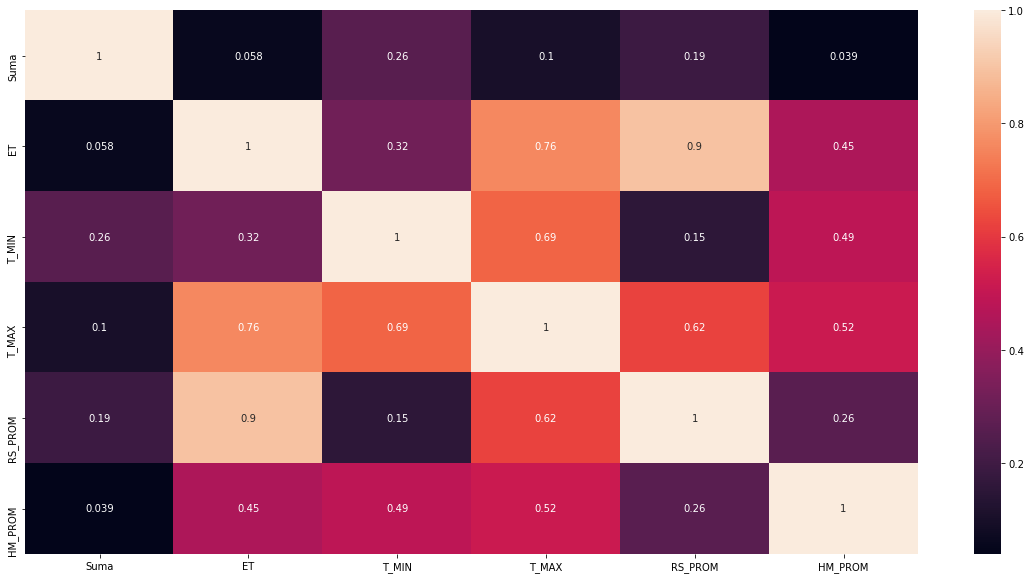

In [59]:
plt.figure(figsize = (20,10))
sns.heatmap(df_union.corr().abs(), annot = True)

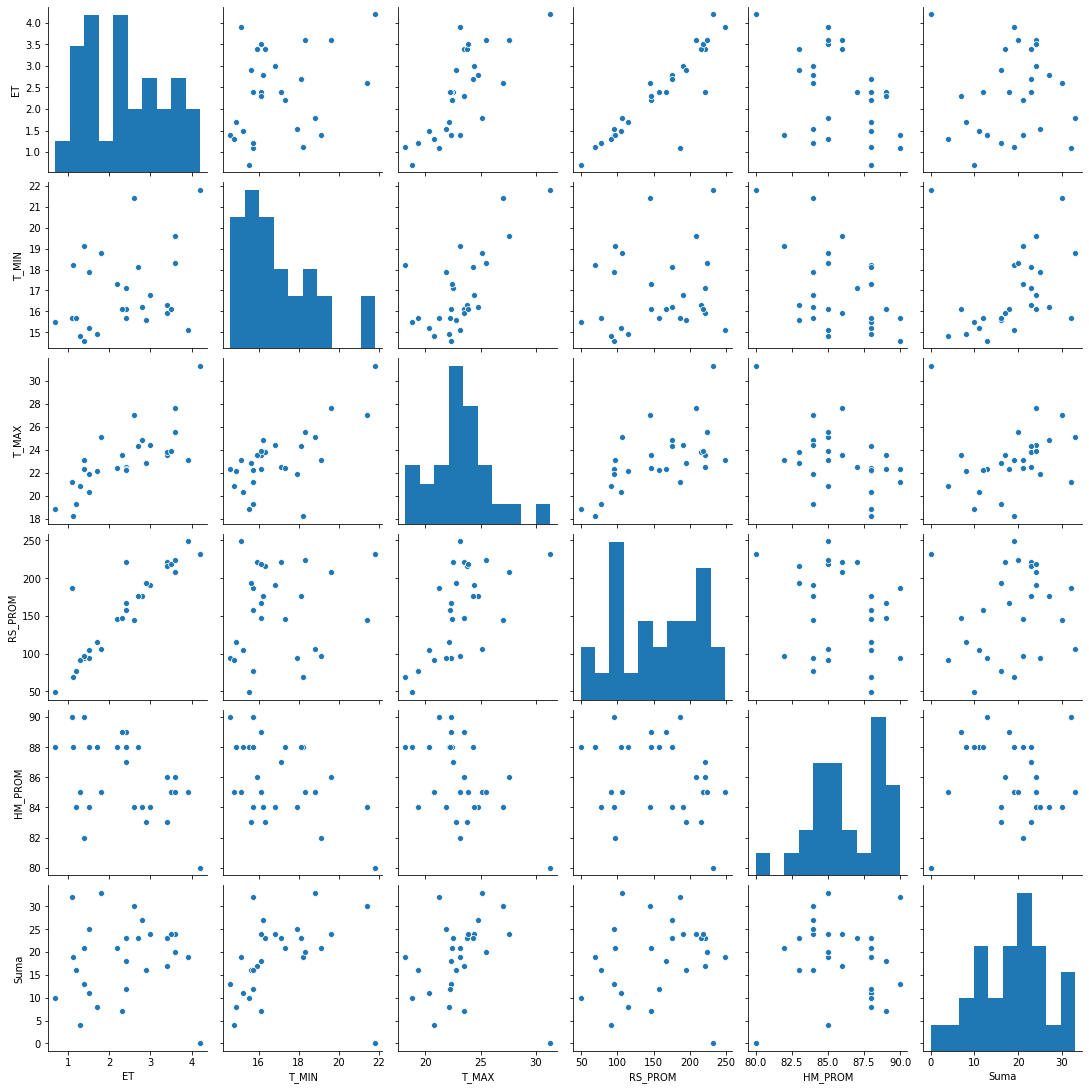

In [51]:
sns.pairplot(df_union)